<div class="alert alert-block alert-danger">
    
### Notes

</div>

### Multiple linear regression, Numerical python, $ \ldots $.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats

from pandas.plotting import scatter_matrix

In [3]:
plt.close('all')

np.random.seed(1234)

<hr/>

<div class="alert alert-block alert-info">
Dataset
</div>

In [4]:
data = pd.read_csv('allentest.txt', sep='\t')
data.head()

,Subj,ACL,SDMT,Vocab,Abstract
0,1,6.0,70,28,36
1,2,5.4,49,34,32
2,3,4.7,28,19,8
3,4,4.8,47,32,28
4,5,4.9,29,22,4


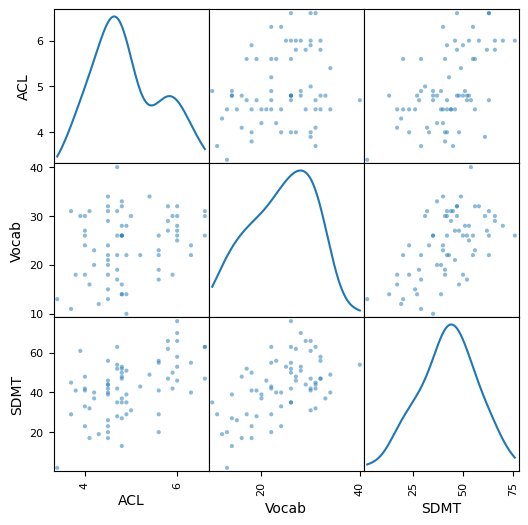

In [5]:
scatter_matrix(data.loc[:, ['ACL', 'Vocab', 'SDMT']], figsize=(6,6), diagonal='kde');

In [6]:
reduced_model_vocab = smf.ols('ACL ~ Vocab', data=data).fit()
reduced_model_sdmt = smf.ols('ACL ~ SDMT', data=data).fit()
full_model = smf.ols('ACL ~ Vocab + SDMT', data=data).fit()

In [7]:
sm.stats.anova_lm(reduced_model_vocab, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
Vocab,1.0,2.690602,2.690602,4.466675,0.03829
Residual,67.0,40.358963,0.602373,NaN,NaN


In [8]:
sm.stats.anova_lm(reduced_model_sdmt, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
SDMT,1.0,11.679891,11.679891,24.946154,0.000004
Residual,67.0,31.369674,0.468204,NaN,NaN


***
##### ANOVA Sequential Sum of Squares

In [9]:
sm.stats.anova_lm(full_model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
Vocab,1.0,2.690602,2.690602,5.678604,0.020060
SDMT,1.0,9.087234,9.087234,19.178903,0.000044
Residual,66.0,31.271729,0.473814,NaN,NaN


***
##### ANOVA Adjusted Sum of Squares

In [10]:
sm.stats.anova_lm(full_model, typ=2)

,sum_sq,df,F,PR(>F)
Vocab,0.097945,1.0,0.206716,0.650845
SDMT,9.087234,1.0,19.178903,0.000044
Residual,31.271729,66.0,NaN,NaN


****

- $H_0: \beta_{SDMT} = 0$
- $H_A: o.w.$

In [11]:
sm.stats.anova_lm(reduced_model_vocab, full_model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,67.0,40.358963,0.0,NaN,NaN,NaN
1,66.0,31.271729,1.0,9.087234,19.178903,0.000044


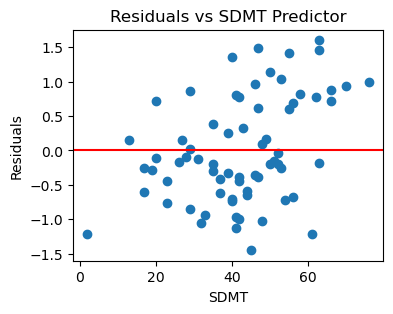

In [12]:
plt.figure(figsize=(4,3))
plt.title('Residuals vs SDMT Predictor')
plt.xlabel('SDMT'), plt.ylabel('Residuals')
plt.axhline(color='r')
plt.scatter(data.loc[:,'SDMT'], reduced_model_vocab.resid);

****

- $H_0: \beta_{Vocab} = 0$
- $H_A: o.w.$

In [13]:
sm.stats.anova_lm(reduced_model_sdmt, full_model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,67.0,31.369674,0.0,NaN,NaN,NaN
1,66.0,31.271729,1.0,0.097945,0.206716,0.650845


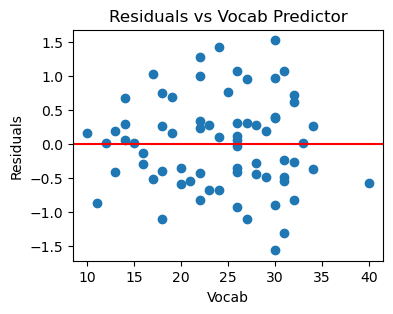

In [14]:
plt.figure(figsize=(4,3))
plt.title('Residuals vs Vocab Predictor')
plt.xlabel('Vocab'), plt.ylabel('Residuals')
plt.axhline(color='r')
plt.scatter(data.loc[:,'Vocab'], reduced_model_sdmt.resid);

<hr/>

<div class="alert alert-block alert-info">
Another dataset (Hypothesis testing)

***

#### Three hypothesis

1)
- $H_0:\beta_i=0$, $\forall i$
- $H_A:\beta_i \neq 0$, $\exists i$


2)
- $H_0:\beta_i=0$
- $H_A:\beta_i \neq 0$


3)
- $H_0:$ subset of the $\{\beta_i\} = 0$
- $H_A: o.w.$

In [15]:
data2 = pd.read_csv('coolhearts.txt', sep='\t')
data2.head()

,Inf,Area,Group,X2,X3
0,0.119,0.34,3,0,0
1,0.190,0.64,3,0,0
2,0.395,0.76,3,0,0
3,0.469,0.83,3,0,0
4,0.130,0.73,3,0,0


In [16]:
full_model2 = smf.ols('Q("Inf") ~ Area + C(X2) + C(X3)', data=data2).fit()
full_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Q("Inf")   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     16.43
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.36e-06
Time:                        20:30:34   Log-Likelihood:                 19.760
No. Observations:                  32   AIC:                            -31.52
Df Residuals:                      28   BIC:                            -25.66
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1345      0.104     -1.293      0.206      -0.348       0.079
C(X2)[T.1]    -0.2435      0.062     -3.909      0.001      -0.371      -0.116
C(X3)[T.1]    -0.0657      0.065     -1.009      0.322      -0.199       0.068
Area           0.6127      0.107      5.723      0.000       0.393       0.832
==============================================================================
Omnibus:                        5.165   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.076   Jarque-Bera (JB):                3.657
Skew:                           0.591   Prob(JB):                        0.161
Kurtosis:                       4.159   Cond. No.                         8.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
##### First hypothesis test:

- $H_0:\beta_i=0$, $\forall i$
- $H_A:\beta_i \neq 0$, $\exists i$

(F = 16.43, P < 0.001).

***
##### Second hypothesis test:

- $H_0:\beta_1 = 0$
- $H_A:\beta_1 \neq 0$

(t = 5.723, P = 0.0)

***

In [17]:
reduced_model2 = smf.ols('Q("Inf") ~ Area', data=data2).fit()

sm.stats.anova_lm(reduced_model2, full_model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,30.0,0.879257,0.0,NaN,NaN,NaN
1,28.0,0.544910,2.0,0.334348,8.590176,0.001233


##### Third hypothesis test:

- $H_0:\beta_2 = \beta_3 = 0$
- $H_A: o.w. $

(F = 8.59, P < 0.001)

***